# Programming Project Title Here

## Programming for Data Analysis Project 

### Andrew Walker - G00398788@gmit.ie

https://www.usga.org/content/dam/usga/pdf/RSI/distance-insights-2021-docs/2020%20Distance%20Report%2026-01-2021.pdf

https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf

https://www.pgatour.com/stats/stat.101.y2021.html

1990 (no major innovations between 1980 and 1990), 2000, 2010, 2020 - simulate data for 2030
Driving distance avg 
Driving accuracy
Scoring average (actual)
GIR

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# FOr downloading
import urllib.request as urlrq

#numpy
import numpy as np

# pyplot
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

### Driving distance

https://www.pgatour.com/stats/stat.101.y2021.html

In [2]:
# Fetch the driving distance stats URL.
resp = rq.get('https://www.pgatour.com/stats/stat.101.y2021.html')
# Have a look
resp



<Response [200]>

In [3]:
# get the current date and time
now = dt.datetime.now()

# format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Create a file path for the original data
path = 'data/driving_stats_csv_' + nowstr + '.html'

path

'data/driving_stats_csv_20211201_090118.html'

In [5]:
# Save the original html file
with open(path, 'w') as f:
    f.write(resp.text)



In [6]:
# Compile the regular expression for matching lines
#re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
#re_rank = re.compile(r'([0-9]{3})(.*)')



In [7]:
#re_rank


In [8]:


# File path for the csv file
path = 'data/driving_stats_csv_' + nowstr + '.csv'



In [9]:
path

'data/driving_stats_csv_20211201_090118.csv'

In [15]:
df = pd.read_csv('data\driving_stats.csv')

print(df.to_string()) 

     Driving Distance  Driving Accuracy   Scoring Average    GIR
0               322.1              74.50            68.06  74.22
1               322.0              73.86            68.76  72.54
2               315.3              71.84            68.76  72.10
3               314.0              71.36            68.80  71.70
4               313.8              71.29            68.81  71.69
5               312.8              69.87            68.94  71.55
6               312.4              69.73            69.03  71.54
7               312.0              69.57            69.07  71.54
8               311.6              69.49            69.10  70.91
9               311.0              69.28            69.13  70.87
10              311.0              68.63            69.27  70.83
11              310.2              68.44            69.41  70.80
12              309.8              68.27            69.42  70.65
13              309.6              68.27            69.42  70.63
14              309.0    

Name
Driving distance avg (https://www.pgatour.com/content/pgatour/stats/stat.101.y2021.html)
Driving accuracy % (https://www.pgatour.com/content/pgatour/stats/stat.102.y2021.html)
GIR (https://www.pgatour.com/content/pgatour/stats/stat.103.y2021.eoff.t013.html)
Fedex Cup Regular Season Standings (https://www.pgatour.com/content/pgatour/stats/stat.02394.y2021.html)

In [16]:
df_arr = df
df_arr.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [17]:
df_arr

,Driving distance avg (yds),Driving accuracy (%),Scoring avg (%),GIR
0,322.1,74.50,68.06,74.22
1,322.0,73.86,68.76,72.54
2,315.3,71.84,68.76,72.10
3,314.0,71.36,68.80,71.70
4,313.8,71.29,68.81,71.69
...,...,...,...,...
191,297.5,NaN,NaN,NaN
192,297.4,NaN,NaN,NaN
193,297.4,NaN,NaN,NaN
194,297.1,NaN,NaN,NaN


In [19]:
# Write a function / loop to plot these histograms
# Investigate how to determine what their distribution is... Skilearn? 

In [23]:
distance2020 = df_arr.iloc[:,0]
distance2020

0      322.1
1      322.0
2      315.3
3      314.0
4      313.8
       ...  
191    297.5
192    297.4
193    297.4
194    297.1
195    297.1
Name: Driving distance avg (yds), Length: 196, dtype: float64

(array([ 1.,  0.,  0.,  8., 36., 71., 50., 21.,  7.,  2.]),
 array([269.2 , 274.49, 279.78, 285.07, 290.36, 295.65, 300.94, 306.23,
        311.52, 316.81, 322.1 ]),
 <BarContainer object of 10 artists>)

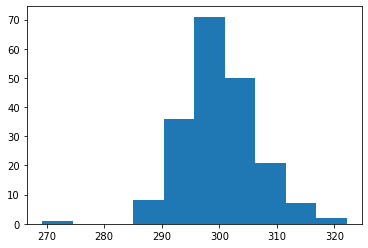

In [24]:
plt.hist(distance2020)

In [25]:
accuracy2020 = df_arr.iloc[:,1]
accuracy2020

0      74.50
1      73.86
2      71.84
3      71.36
4      71.29
       ...  
191      NaN
192      NaN
193      NaN
194      NaN
195      NaN
Name: Driving accuracy (%), Length: 196, dtype: float64

(array([21., 23., 15., 16.,  8.,  7.,  5.,  2.,  1.,  2.]),
 array([60.2 , 61.63, 63.06, 64.49, 65.92, 67.35, 68.78, 70.21, 71.64,
        73.07, 74.5 ]),
 <BarContainer object of 10 artists>)

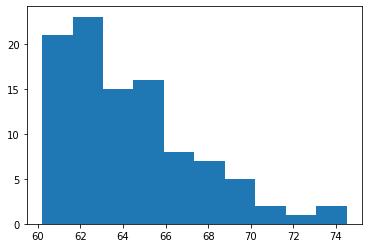

In [26]:
plt.hist(accuracy2020)

In [27]:
scoring2020 = df_arr.iloc[:,2]
scoring2020

0      68.06
1      68.76
2      68.76
3      68.80
4      68.81
       ...  
191      NaN
192      NaN
193      NaN
194      NaN
195      NaN
Name: Scoring avg (%), Length: 196, dtype: float64

(array([ 1.,  0.,  0.,  5.,  4.,  2., 10., 13., 26., 39.]),
 array([68.06 , 68.286, 68.512, 68.738, 68.964, 69.19 , 69.416, 69.642,
        69.868, 70.094, 70.32 ]),
 <BarContainer object of 10 artists>)

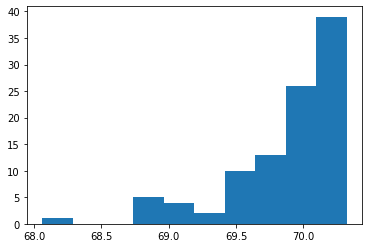

In [28]:
# make a note that low scoring is better
plt.hist(scoring2020)

In [31]:
gir2020 = df_arr.iloc[:,3]
gir2020

0      74.22
1      72.54
2      72.10
3      71.70
4      71.69
       ...  
191      NaN
192      NaN
193      NaN
194      NaN
195      NaN
Name: GIR, Length: 196, dtype: float64

(array([19., 25., 15., 14., 13.,  6.,  5.,  2.,  0.,  1.]),
 array([66.93 , 67.659, 68.388, 69.117, 69.846, 70.575, 71.304, 72.033,
        72.762, 73.491, 74.22 ]),
 <BarContainer object of 10 artists>)

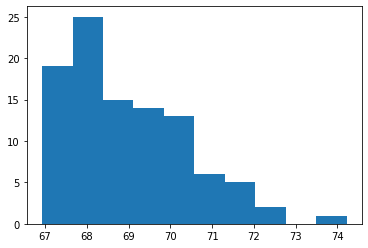

In [32]:
plt.hist(gir2020)

In [ ]:
# Driving accurary
mu, sigma = 316.5, 5.1

x = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(x, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/



In [ ]:
x.max()

In [ ]:
x.min()

In [ ]:
len(x)

In [ ]:
# Driving accuracy average
mu, sigma = 62.6, 3.1

y = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(y, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/

In [ ]:
y.max(), y.min(), len(y)


In [ ]:
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

In [ ]:
mu, sigma = 69.4, 0.4

z = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(z, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

In [ ]:
mu, sigma = 70.2, 1.5

zz = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(zz, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

In [ ]:
my_array = np.array([[x],[y],[z],[zz]])
                    
my_array

In [ ]:
#irisData = pd.read_csv('bezdekIris.data', header = None)  
#irisData.columns = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)','Class']

In [ ]:
df = pd.DataFrame(np.concatenate(my_array))


print(df)
print(type(df))

In [ ]:
df_t = df.T
df_t.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [ ]:
df_t.head()

In [ ]:
sns.pairplot(df_t, kind="reg", plot_kws={'line_kws':{'color':'red'}})
# https://stackoverflow.com/questions/50722972/change-the-regression-line-colour-of-seaborns-pairplot